In [10]:
from Modules.tweepy_streaming import saveTweepyTweets
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from wordcloud import WordCloud, STOPWORDS
from imageio import imread

import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import config
import warnings

warnings.filterwarnings("ignore")

In [2]:
tweepy_listener = saveTweepyTweets(time_limit=180, 
                                   num_of_tweets=50, 
                                   save_file='twitter_stream_data.json', 
                                   retweets=False)
auth = OAuthHandler(config.CONSUMER_KEY, config.CONSUMER_SECRET)
auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)
stream = Stream(auth=auth, listener=tweepy_listener)

In [3]:
stream.filter(track=['anime'], languages=['en'], async=True)

Getting tweet #1...
Getting tweet #2...
Getting tweet #3...
Getting tweet #4...
Getting tweet #5...
Getting tweet #6...
Getting tweet #7...
Getting tweet #8...
Getting tweet #9...
Getting tweet #10...
Getting tweet #11...
Getting tweet #12...
Getting tweet #13...
Getting tweet #14...
Getting tweet #15...
Getting tweet #16...
Getting tweet #17...
Getting tweet #18...
Getting tweet #19...
Getting tweet #20...
Getting tweet #21...
Getting tweet #22...
Getting tweet #23...
Getting tweet #24...
Getting tweet #25...
Getting tweet #26...
Getting tweet #27...
Getting tweet #28...
Getting tweet #29...
Getting tweet #30...
Getting tweet #31...
Getting tweet #32...
Getting tweet #33...
Getting tweet #34...
Getting tweet #35...
Getting tweet #36...
Getting tweet #37...
Getting tweet #38...
Getting tweet #39...
Getting tweet #40...
Getting tweet #41...
Getting tweet #42...
Getting tweet #43...
Getting tweet #44...
Getting tweet #45...
Getting tweet #46...
Getting tweet #47...
Getting tweet #48...
G

In [4]:
stream.disconnect()


In [4]:
data = []
with open('twitter_stream_data.json', 'r') as json_data:
    for line in json_data:
        tweet = json.loads(line) # load it as Python dict
        data.append(tweet)
        #data = data.append(tweet)
        #print(json.dumps(tweet, indent=4)) # pretty-print

In [5]:
tweet_df = pd.DataFrame(data)

In [6]:
tweet_df['text']

0     check https://t.co/TxcWh4bV4Y \n#anime \n#mang...
1     Learn more about this amazing Zero helmet in o...
2     Head Angles || By: @kunaru__\nVisit https://t....
3                    block me if you watch anime dubbed
4     Some daily Tittys for you! #hentai #ecchi #ani...
5     The season's almost over and anime are throwin...
6     @GrantAwa @fxggotmoods @FUNimation They said t...
7     @Rabbit__Hero // Absolutely. I'm sure they kno...
8     @stinkybrando Half an anime avi -50\neGirl -66...
9             @business @tictoc Stop making anime real.
10    We’ve just added LOADS of new events to our ca...
11    THE GAME PLAN! || Naruto Anime Modpack Episode...
12    @NitroRad wario's doing the anime titty grab t...
13    @Mohrrix My stance on it. It was a joke in the...
14    @RobhRyan @cooywriter1 @globeandmail @GlobeDeb...
15    "every anime fandom is overrated except for he...
16    ( . )( . )?? #hentai #ecchi #porn #anime #sexy...
17    Guess who'll be speaking anime soon enough

In [7]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [8]:
tweet_df['text'].map(clean_tweet)

0                 check anime manga cartoons animegirls
1     Learn more about this amazing Zero helmet in o...
2     Head Angles By Visit Like anime and animeart F...
3                    block me if you watch anime dubbed
4     Some daily Tittys for you hentai ecchi anime p...
5     The season s almost over and anime are throwin...
6     They said they would mention anime whether it ...
7     Hero Absolutely I m sure they know by this poi...
8                        Half an anime avi 50 eGirl 666
9                                Stop making anime real
10    We ve just added LOADS of new events to our ca...
11    THE GAME PLAN Naruto Anime Modpack Episode 7 M...
12             wario s doing the anime titty grab thing
13    My stance on it It was a joke in the manga Mea...
14    Also from your picture I can see that you re e...
15    every anime fandom is overrated except for hel...
16    hentai ecchi porn anime sexy lewd NSFW 2girls ...
17    Guess who ll be speaking anime soon enough

<a href='http://archive.ics.uci.edu/ml/machine-learning-databases/00331/'>Datasets found here </a>

In [11]:
amazon = pd.read_csv('sentiment_labelled_sentences/amazon_cells_labelled.txt', 
                     sep='.\t', 
                     header=None, 
                     names=['text', 'sentiment'])
imdb = pd.read_csv('sentiment_labelled_sentences/imdb_labelled.txt', 
                     sep='.\t', 
                     header=None, 
                     names=['text', 'sentiment'])
yelp = pd.read_csv('sentiment_labelled_sentences/yelp_labelled.txt', 
                     sep='.\t', 
                     header=None, 
                     names=['text', 'sentiment'])

In [12]:
sentiment = amazon.append(imdb, ignore_index=True).append(yelp, ignore_index=True)

In [13]:
pos_sentiment = sentiment[sentiment['sentiment'] == 1]
neg_sentiment = sentiment[sentiment['sentiment'] == 0]

In [14]:
mask_ = imread('assets/Cloud-app-icon.png')

In [19]:
def wordcloud_draw(data, mask=None, color='white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word 
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color, 
                          mask=mask,
                          width=2500,
                          height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

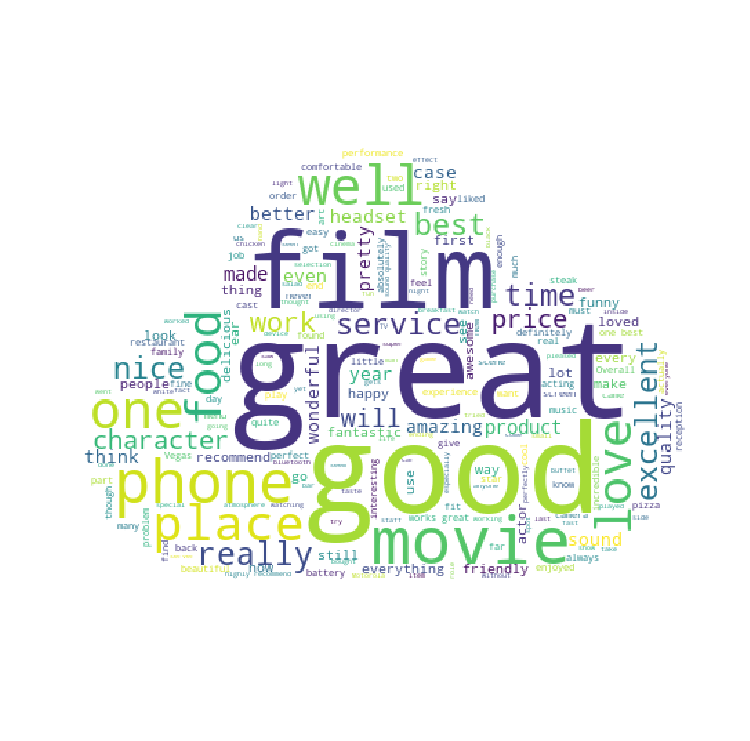

In [16]:
wordcloud_draw(data=pos_sentiment['text'], mask=mask_)

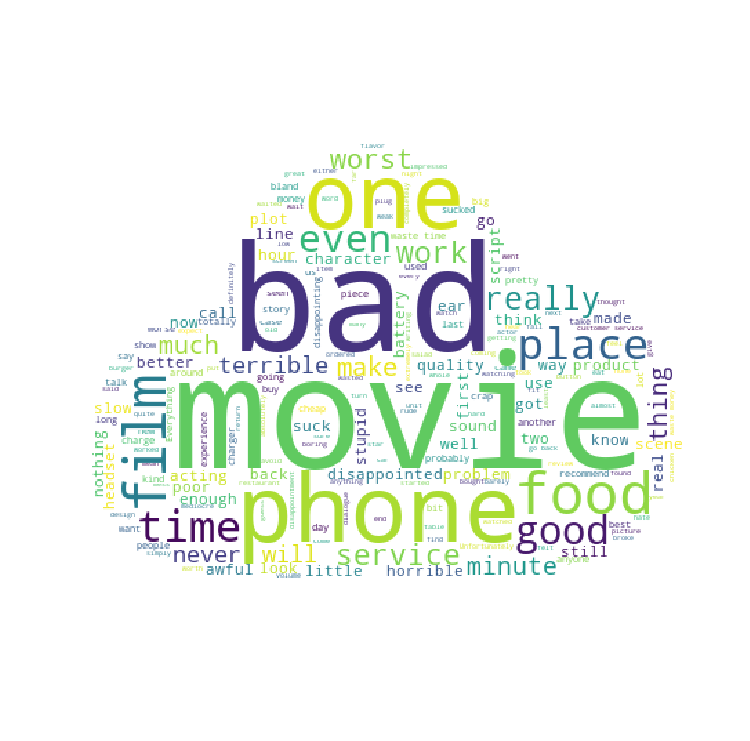

In [18]:
wordcloud_draw(neg_sentiment['text'], mask=mask_)

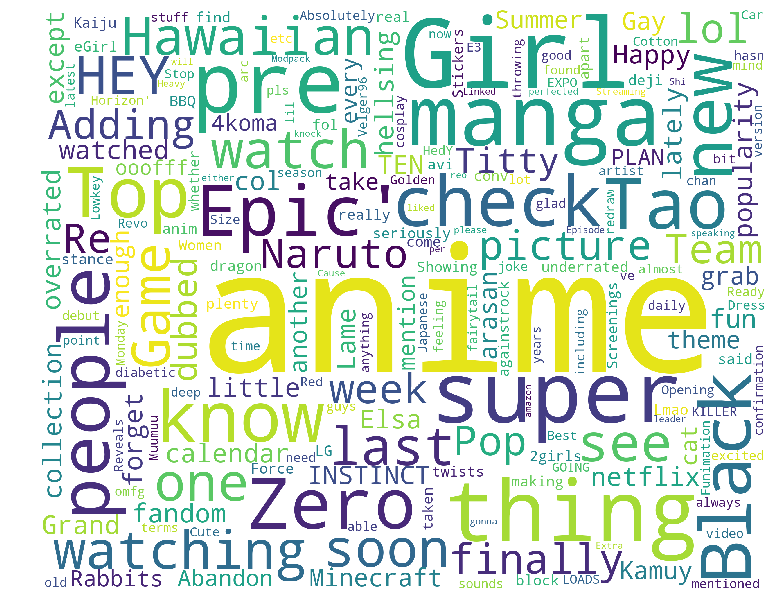

In [20]:
wordcloud_draw(tweet_df['text'])